In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import square

In [28]:
def generar_cuadrada(frecuencia, duracion, Muestras, duty_cycle):
    
    t = np.linspace(0, duracion, Muestras, endpoint=False)
    signal_square = square(2 * np.pi * frecuencia * t, duty=duty_cycle)

    # Ajustar el ancho del pulso
    signal_square = 0.5 * (signal_square + 1)  # Escalar y desplazar para ajustar el ancho

    return t, signal_square

#SamplingRate = '{:.2e}'.format(150e6)
Muestras = 100000

print(f"SamplingRate = {Muestras}")

c = 2.988e8             #Velocidad de la luz
Dmin = 2                #Distancia minima que detecta el radar
Dmax = 10               #Distancia maxima que detecta el radar


PRI = (Dmax*2)/c        #Frecuenca de transmision de pulsos del radar [s]
PRF = 1/PRI             #Periodo de transmision de pulsos de radar    [s]
PL = (Dmin*2)/c         #Ancho del pulso a transmitir                 [s]
duracion = PRI * 10
duty_cycle = PL / PRI

# Generar señal cuadrada con parámetros variables
t, signal_square = generar_cuadrada(PRF, duracion, Muestras, duty_cycle)

SamplingRate = 100000


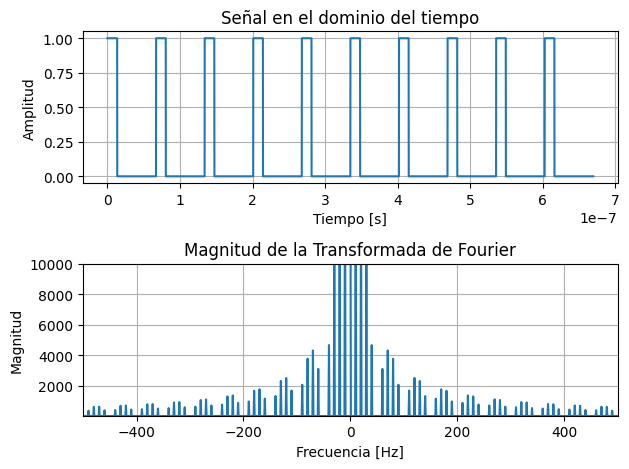

In [31]:
# Calcular la Transformada de Fourier
fft_result = np.fft.fft(signal_square)
frequencies = np.fft.fftfreq(len(signal_square), 1/Muestras)  # Vector de frecuencias

# Graficar la señal en el dominio del tiempo
plt.subplot(2, 1, 1)
plt.plot(t, signal_square)
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Señal en el dominio del tiempo')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(fft_result))
plt.xlabel('Frecuencia [Hz]')
plt.xlim(-500, 500)
plt.ylabel('Magnitud')
plt.ylim(50, 10000)
plt.title('Magnitud de la Transformada de Fourier')
plt.tight_layout()
plt.grid(True)

plt.show()

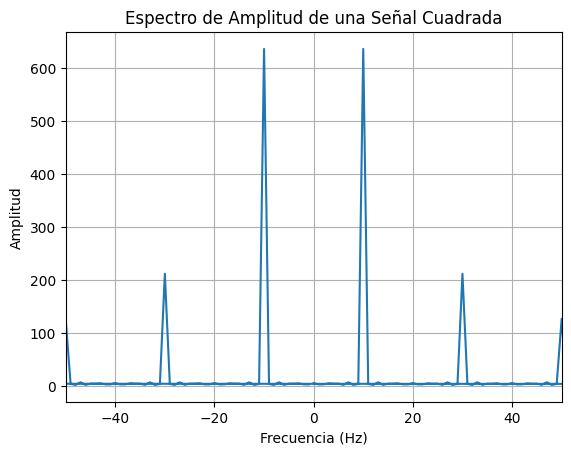

In [23]:
# Parámetros de la señal cuadrada
Fs = 1000  # Frecuencia de muestreo en Hz
T = 1      # Duración de la señal en segundos
f0 = 10    # Frecuencia fundamental de la señal cuadrada en Hz
t = np.linspace(0, T, Fs*T, endpoint=False)  # Vector de tiempo
square_signal = np.sign(np.sin(2 * np.pi * f0 * t))  # Señal cuadrada

# Calcular la Transformada de Fourier
fft_result = np.fft.fft(square_signal)
frequencies = np.fft.fftfreq(len(square_signal), 1/Fs)  # Vector de frecuencias

# Graficar el espectro de amplitud
plt.plot(frequencies, np.abs(fft_result))
plt.xlabel('Frecuencia (Hz)')
plt.xlim(-50, 50)
plt.ylabel('Amplitud')
plt.title('Espectro de Amplitud de una Señal Cuadrada')
plt.grid(True)
plt.show()

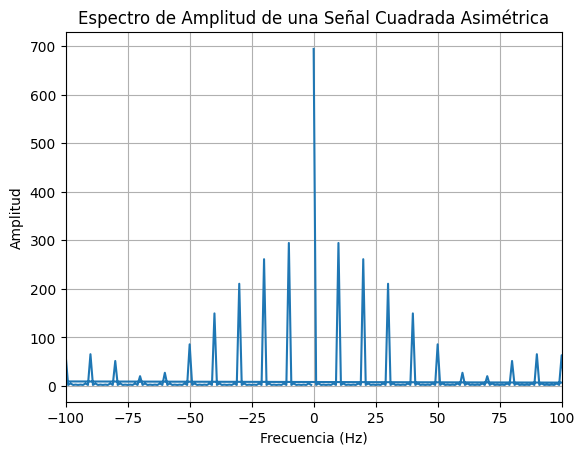

In [26]:
# Parámetros de la señal cuadrada asimétrica
Fs = 1000  # Frecuencia de muestreo en Hz
T = 1      # Duración de la señal en segundos
f0 = 10    # Frecuencia fundamental de la señal cuadrada en Hz
duty_cycle = 0.15  # Ciclo de trabajo del 15%

# Generar la señal cuadrada asimétrica
t = np.linspace(0, T, Fs*T, endpoint=False)  # Vector de tiempo
square_signal = np.where(np.mod(t * f0, 1) < duty_cycle, 1, -1)  # Señal cuadrada asimétrica

# Calcular la Transformada de Fourier
fft_result = np.fft.fft(square_signal)
frequencies = np.fft.fftfreq(len(square_signal), 1/Fs)  # Vector de frecuencias

# Graficar el espectro de amplitud
plt.plot(frequencies, np.abs(fft_result))
plt.xlabel('Frecuencia (Hz)')
plt.xlim(-100, 100)
plt.ylabel('Amplitud')
plt.title('Espectro de Amplitud de una Señal Cuadrada Asimétrica')
plt.grid(True)
plt.show()